In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import random
import seaborn as sns

# Question 1

In [2]:
# Functions that might be useful (please read the documentation)
# x.flatten() (take a N-dimensional numpy array and make it one-dimensional)
# numpy.random.choice -- choose from the list of images
# numpy.dot -- compute the dot product
# numpy.random.normal -- set up random initial weights

DIM = (28, 28) #these are the dimensions of the image

def load_image_files(n, path="images/"):
    # helper file to help load the images    
    # returns a list of numpy vectors
    images = []
    for f in os.listdir(os.path.join(path, str(n))): # read files in the path
        p = os.path.join(path, str(n), f)
        if os.path.isfile(p):
            i = np.loadtxt(p)
            assert i.shape == DIM # just check the dimensions here
            # i is loaded as a matrix, but we are going to flatten it into a singlevector
            images.append(i.flatten())
    return images

# Load up these image files
A = load_image_files(0)
B = load_image_files(1)

N = len(A[0])  # the total size
assert N == DIM[0] * DIM[1]  # just check our sizes to be sure

# set up some random initial weights
weights = np.random.normal(0, 1, size=N)

In [3]:
#helper functions
def vector(image_vector):
    return np.array([i for i in image_vector])
def big_vector(image_vectors, weights, step_length = 0.01):
    for vec in image_vectors:
        product = np.dot(vec, weights)
        if product > 0:
            weights = weights - step_length*vector(vec)
    return weights
def small_vector(image_vectors, weights, step_length = 0.01):
    for vec in image_vectors:
        product = np.dot(vec, weights)
        if product < 0:
            weights = weights + step_length*vector(vec)
    return weights

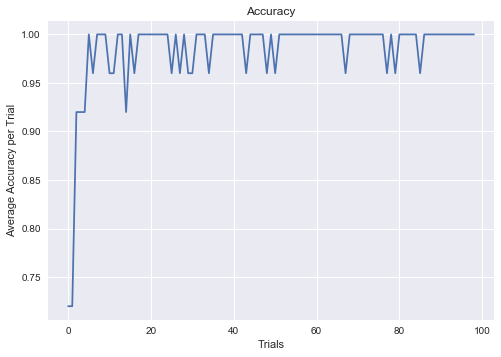

In [4]:
weights = np.random.normal(0, 1, size=N)
a = [list(i) for i in A]
b = [list(i) for i  in B]
a_b= a+b
count_list=[]
for i in range(1,100): 
    ran = random.sample(a_b,25)
    for vec in ran:
        product = np.dot(vec, weights)
        if product > 0 and vec in a: 
            weights = weights - 0.02*vector(vec)
        elif product < 0 and vec in b: 
            weights = weights + 0.02*vector(vec)
    count=0
    for r in ran:
        if r in a and np.dot(np.array(r), weights) < 0:
            count += 1
        if r in b and np.dot(np.array(r), weights) > 0:
            count += 1
    count_list.append(count/25)
plt.plot(count_list)
plt.xlabel("Trials")
plt.ylabel("Average Accuracy per Trial")
plt.title('Accuracy')
plt.show()

# Question 2



My solution to Question 1 converges to 100% accuracy. I think that means the predictions are correct and we can distinguish between 0 and 1 so they are linearly separable on this feature space.

# Question 3

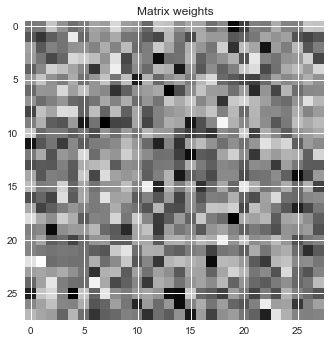

In [6]:
new_matrix = np.reshape(weights, (28, 28))
plt.imshow(new_matrix)
plt.grid(True)
plt.title('Matrix weights')
plt.show()

Large negative values means that there is a 0 at that pixel. Large positive values means that there is a 1 at that pixel. Numbers near zero mean that the pixel doesn't have a significant way to distinguish between 0 and 1. The matrix is supposed to have dark surrounding a lighter part where we can distinguish between the shape of 0 and 1.

# Question 4

In [ ]:
def replace_zero(weights,num):
    weights_copy=weights 
    sorted_weights=sorted(weights,key= lambda x: abs(x))
    for i in range(num): 
        weights_copy[list(weights).index(sorted_weights[i])]=0
    return weights_copy
def test():
    res=[]
    ex=random.sample(a_b,200)
    for num in range(10,790,10):
        count=0 
        weights_copy=replace_zero(weights,num)
        for e in ex:
            if e in a and np.dot(np.array(e),weights_copy)<0:
                count+=1
            if e in b and np.dot(np.array(e),weights_copy)>0:
                count+=1
        res.append(count/200)
    return res
res=test()

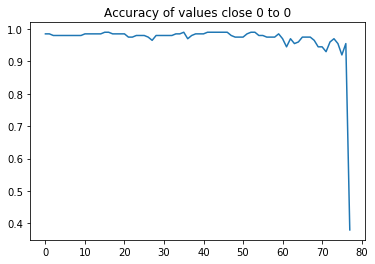

In [28]:
plt.plot(res)
plt.title('Accuracy of values close 0 to 0')
plt.show()

We can see that a couple of points are crucial to seeing whether the number is "0" or "1". So for the image, 0 and 1 are easy to separate and only a few useful pixels play a significant role for the diagnostic. When the changing values are close to 0 and 0, the accurary does't really increase .

# Question 5

In [7]:
zero=load_image_files(0)
one=load_image_files(1)    
two=load_image_files(2)
three=load_image_files(3)
four=load_image_files(4)
five=load_image_files(5)
six=load_image_files(6)
seven=load_image_files(7)
eight=load_image_files(8)
nine=load_image_files(9)

In [8]:
zero=[list(i) for i in zero]
one=[list(i) for i in one]
two=[list(i) for i in two]
three=[list(i) for i in three]
four=[list(i) for i in four]
five=[list(i) for i in five]
six=[list(i) for i in six]
seven=[list(i) for i in seven]
eight=[list(i) for i in eight]
nine=[list(i) for i in nine]

digits=[zero,one,two,three,four,five,six,seven,eight,nine]

In [9]:
def accuracy(first,second):
    sam=first+second
    ex=random.sample(sam,100)
    count=0
    weights = np.random.normal(0,1,size=N) 
    for i in range(50):
        weights=big_vector(first,weights,0.02) 
        weights=small_vector(second,weights,0.02) 
    for e in ex:
        if e in first and np.dot(np.array(e),weights)<0:
            count+=1
        if e in second and np.dot(np.array(e),weights)>0:
            count+=1
    res = count/100
    return res
res=[]
for x in range(len(digits)): 
    sub_res=[]
    for y in range(len(digits)): 
        if x < y:
            acc=accuracy(digits[x],digits[y])
            sub_res.append(acc)

    res.append(sub_res)

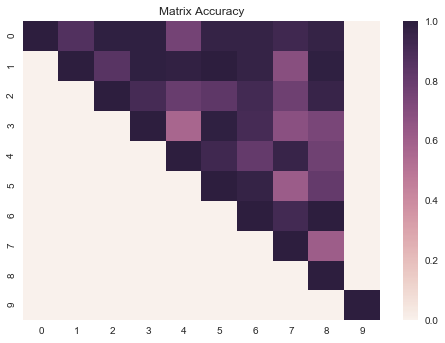

In [10]:
df = np.zeros((10,10))
for i in range(10):
    for j in range(1,10):
        if j < len(res[i]):
            df[i][j+i]=res[i][j]
        
for i in range(10):
    df[i,i]=1

sns.heatmap(df)
plt.title("Matrix Accuracy")
plt.show()

It is difficult to distinguish between the pairs because they have similar features. The pairs with similar numbers are stronger compared to pairs that have numbers far away.